## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
# Читаем файл и выводим первые 10 строк
import pandas as pd

df = pd.read_csv('/datasets/data.csv')

df.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
# Выводим названия столбцов

df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [3]:
# Выводим данные о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# считаем долю пропусков по столбцам
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

### Вывод

* Названия столбцов записаны корректно


* days_employed - тип float, а не int, часть данных отрицательные, количество пропусков 10% есть значение 340266 дней = 934 года, чего быть не может. Для данного исследования это не критично, т.к. для ответа на поставленные вопросы эти данные не нужны. Стоит сообщить разработчику о данном несоответствии. 


* education - тип object, категории написаны в разных регистрах, пропусков нет. Стоит привести все к нижнему регистру и сообщить об этом разработчику.


* family_status - тип object, пропусков нет.


* total_income - тип float, количество пропусков 10%. Процент возврата в строках с пропуском 7.8%, такойже как и в строках без пропуска 8.0%, Поэтому пропуски заменим на среднее значение. Просмотрев данные понятно, что пропуски не означают отсутствие дохода, т.к. он есть и у пенсионеров и у госслужащих, по которым есть пропуски. Стоит сообщить разработчику об этих пропусках.


* purpose - тип odject, различное написание категорий, пропусков нет. Стоит сообщить об этом разработчику.

In [5]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Шаг 2. Предобработка данных

### Обработка пропусков

In [6]:
# Смотрим строки с пропусками в 'total_income'
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Процент встречающейся задолженности в строках с пропусками в столбце 'total_income' - 7.8%, такойже как и в строках без пропуска - 8.0%. Также просмотрев данные понятно, что пропуски не означают отсутствие дохода, т.к. он есть и у пенсионеров и у госслужащих, у которых доход не нулевой. Таким образом пропуски в столбце 'total_income' не принадлежат какой-то особой категории граждан с точки зрения наличия задолженности и их можно заменить на среднее значение.  Стоит сообщить разработчику об этих пропусках.

In [7]:
# Заменяем все пропуски в столбце 'total_income' на среднее значение в этом столбце
# Проверяем после изменения отсутствие пропусков в столбце 'total_income'

df['total_income'] = df['total_income'].fillna(df['total_income'].mean())

df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Вывод

* В данных есть пропуски в столбцах 'days_employed' и 'total_income'. 
* Т.к. пропуски в столбце 'total_income', не говорят об отсутствии дохода у человека, а также т.к. процент возвратов равен проценту возвратов по тем у кого данные о доходах есть, то пропуски, которых 10% заменили средним значением.
* Пропуски в столбце 'days_employed' не заполняем, т.к. для ответа на поставленные вопросы он нам не потребуется.

In [8]:
display(df['total_income'].mean())
display(df['total_income'].median())

167422.30220817297

156400.3198360834

### Замена типа данных

In [9]:
# Замена типа данных float64 на int64 в столбце total_income и проверка

df['total_income'] = df['total_income'].astype(int)

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Вывод

Теперь данные в столбце 'total_income' имеют тип int, а не float, что не ведет к потере информации, но зато увеличивает скорость обработки и экономит память.

### Обработка дубликатов

In [10]:
# Приведение к нижнему регистру столбца 'education' и проверка

df['education'] = df['education'].str.lower()

print(df.head())

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M   сотрудник     0        145885   
3   женат / замужем                 0      M   сотрудник     0        267628   
4  гражданский брак                 1      F   пенсионер     0        158616   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  


In [11]:
# Проверяем наличие дубликатов вручную в столбце 'family_status'
print(df['family_status'].value_counts())

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


In [12]:
# Проверяем наличие дубликатов вручную в столбце 'purpose'
print(df['purpose'].value_counts())

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [13]:
# Считаем дубликаты строк в данных
print('Количество дубликатов', df.duplicated().sum())

Количество дубликатов 71


In [14]:
# Удаляем дубликаты строк и проверяем
df = df.drop_duplicates().reset_index(drop = True)

print('Осталось дубликатов после удаления-', df.duplicated().sum())

Осталось дубликатов после удаления- 0


### Вывод

После приведения значений столбца 'education' к нижнему регистру был обнаружен и удален 71 дубликат строк. Стоит указать разработчику на наличие дубликатов в данных и беспорядке в регистрах в столбце 'education'. Дубликатов в столбцах 'education', 'family_status', 'income_type' не обнаружено.

### Лемматизация

In [15]:
# Добавляем лемматизированный столбец

from pymystem3 import Mystem
m = Mystem()


df['purpose_lem'] = df['purpose'].apply(m.lemmatize)

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lem
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


### Вывод

К таблице добавлен столбц 'purpose_lem' с лемматизированным значением 'purpose' для дальнейшей категоризации целей кредита. 

### Категоризация данных

In [16]:
# Функция для определения категории по лемматизированному значению цели кредита столбца 'purpose_lem'

def purpose_category(data):
           
        if 'автомобиль' in data:
            return 'автомобиль'
        
        if 'свадьба' in data:
            return 'свадьба'
        
        if 'недвижимость' in data:
            return 'недвижимость'
        
        if 'жилье' in data:
            return 'недвижимость' 
        
        if 'образование' in data:
            return 'образование'
        
        else:
            return 'not_define'       


In [17]:
# Категоризация столбца 'purpose' через столбец 'purpose_lem'. Категорию записываем в столбец 'purpose_category'

df['purpose_category'] = df['purpose_lem'].apply(purpose_category)

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lem,purpose_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба


In [18]:
# Проверка на наличие категории 'not_define' в столбце 'purpose_category'

df[df['purpose_category'] == 'not_define']['purpose_category'].count()

0

### Вывод

### Все цели кредита можно разделить на 4 категории
* автомобиль
* свадьба
* недвижимость
* образование

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [19]:
# Группируем по количеству детей и считаем объем в группах и долю задолженностей в группах
df.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
-1,47,0.021277
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000
20,76,0.105263


In [20]:
# Отбираем тех у кого нет детей и считаем их количество и долю задолженностей у них
df[df['children'] != 0]['debt'].agg(['count', 'mean'])

count    7363.000000
mean        0.092082
Name: debt, dtype: float64

### Вывод

### Наличие детей влияет на задолженность по кредиту. При наличии у заемщика детей, средний процент заемщиков, которые имели задолженность равен 9.2%, а при их отсутствии 7,5%. Вероятнее всего это связано с тем, что люди с детьми не готовы сокращать расходы на детей и в случае нехватки денег предпочитают допустить задолженность. Людям же у которых нет детей, напротив, легче сэкономит деньги на себе и не допустить просрочки. Стоит отметить, что кредитов людям с детьми выдано вдвое больше, чем людям без детей (14 091 против 7 363).

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [21]:
# считаем процент задолженности по семейным статусам
df.groupby('family_status')['debt'].agg(['count', 'mean'])

,count,mean
family_status,,
Не женат / не замужем,2810,0.097509
в разводе,1195,0.071130
вдовец / вдова,959,0.065693
гражданский брак,4151,0.093471
женат / замужем,12339,0.075452


### Вывод

### Семейное положение влияет на задолженность по кредиту.
### Так самый высокий процент заемщиков у которых была задолженность наблюдается у людей со статусом "Не женат / не замужем" - 9.8%, а также у людей со статусом "гражданский брак " - 9.3%. Возможно это связано с тем, что обе эти группы имеют минимум обязательств и поэтому не уделяют особого внимания ведению бюджета и часто совершают спонтанные траты.

### Самый низкий процент встречающейся задолженности у людей со статусом "вдовец / вдова" - 6.6%. К этой категории относятся сформировавшиеся люди с устоявшимся образ жизни, что ведет к более редкому возникновению задолженностей.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [22]:
# минимальный уровень ежемесячного дохода
df['total_income'].min()

20667

In [23]:
# максимальный уровень ежемесячного дохода
df['total_income'].max()

2265604

In [24]:
# средний уровень ежемесячного дохода
df['total_income'].mean()

167421.82115223267

In [25]:
# медиана ежемесячного дохода
df['total_income'].median()

156043.5

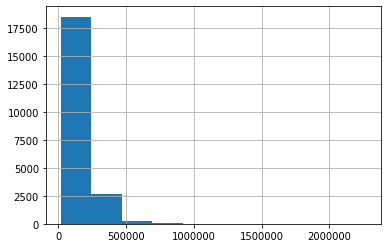

In [26]:
# плотность распределения ежемесячного дохода по заемщикам
df['total_income'].hist()

In [27]:
# функция категоризации заемщиков по ежемесячному доходу

def total_income_category(income):
    
    if 0 <= income <= 100000:
        return '(0 : 100000]'
    
    if 100000 < income <= 200000:
        return '(100000 : 200000]'
    
    if 200000 < income <= 400000:
        return '(200000 : 400000]'
    
    if income > 400000:
        return '(400000 : +]'
    
    else:
        return 'not_define'
    

In [28]:
# определяем категории в зависимости от ежемесячного дохода
# путем применения функции total_income_category() к столбцу 'total_income'

df['total_income_category'] = df['total_income'].apply(total_income_category)

df.head()



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lem,purpose_category,total_income_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,(200000 : 400000]
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,(100000 : 200000]
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,(100000 : 200000]
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,(200000 : 400000]
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,(100000 : 200000]


In [29]:
# проверяем не появилась ли категория 'not_define' в столбце 'total_income_category'
df[df['total_income_category'] == 'not_define']['total_income_category'].count()

0

In [30]:
# находим объмы категорий в 'total_income_category' и процент задолженности в категории
df.groupby('total_income_category')['debt'].agg(['count', 'mean'])

,count,mean
total_income_category,,
(0 : 100000],4463,0.079319
(100000 : 200000],11925,0.086289
(200000 : 400000],4538,0.072058
(400000 : +],528,0.058712


### Вывод

### Частота задолженностей при увеличении суммы кредита сначала растет, а затем снижается.  Вероятно это связано с тем, что небольшие суммы кредита берут не очень успешные люди у которых присутствует неуверенность в финансовых вопросах и некоторый страх перед банком,  и поэтому они прикладывают максимум усилий на своевременные выплаты кредита. Далее по мере роста суммы кредита люди уже более уверены в себе, у них меньше страха перед банком, и их не так сильно пугает задолженность. При дальнейшем росте суммы кредита мы наблюдаем финансово успешных людей, которые хорошо планируют свой бюджет, свои доходы и расходы. В следствие чего и просрочки у них возникают реже всего.  
* При сумме кредита до 100 000 частота задоленности 7.9%
* При сумме кредита от 100 000 до 200 000 частота задоленности 8.6%
* При сумме кредита от 200 000 до 400 000 частота задоленности 7.2%
* При сумме кредита более 400 000 частота задоленности 5.9%

- Как разные цели кредита влияют на его возврат в срок?

In [31]:
# находим объмы категорий в 'purpose_category' и процент задолженности в них
df.groupby('purpose_category')['debt'].agg(['count', 'mean'])

,count,mean
purpose_category,,
автомобиль,4306,0.093590
недвижимость,10811,0.072334
образование,4013,0.092200
свадьба,2324,0.080034


### Вывод

### Разные цели кредита влияют на наличие задолженности.
### Так, самый высокий процент задолженности в кредитах, цель которых "автомобиль" - 9.4% и "образование" - 9.2%. Возможно это связано с тем, что молодежь в погоне за более статусным автомобилем переоценивает свои силы по выплате кредита. В случае с образованием ситуация может быть связана с несоответствиям ожиаемых доходов после обучения с фактическими. К томуже наверняка часто кредит на образование берут родители для своих детей, которые могут не справиться и забросить учебу.
### "Свадьба" - 8%. Имеет средний показатель по задолженности. Скорее всего потому, что на свадьбу молодоженам обычно дарят много  денег, что облегчает выплату кредитов, но и разводы случаются часто, которые вносят свои сложности.  
### Реже всего задолженность встречается в кредитах с целью "недвижимость" - 7.2%. Такие кредиты берут люди с определенным финансовым достатком, которые хорошо планируют свои доходы и расходы.

### Шаг 4. Общий вывод

Проведенное исследование показало:
* Наличие детей влияет на задолженность по кредиту. При наличии у заемщиков детей, средний процент задолженности равен 9.2%, а при их отсутствии 7,5%.


* Семейное положение также влияет на задолженность по кредиту. Так, самый высокий процент заемщиков у которых была задолженность наблюдается у людей со статусом "Не женат / не замужем" - 9.8%, а самый низкий у людей со статусом "вдовец / вдова" - 6.6%.


* Частота задолженностей при увеличении суммы кредита сначала растет от 7.9%, до 8.6% а затем снижается до 5.9%


* Разные цели кредита влияют на наличие задолженности. Так, самый высокий процент задолженности в кредитах, цель которых "автомобиль" - 9.4%.  Реже всего задолженность встречается в кредитах с целью "недвижимость" - 7.2%.

Также стоит отметить, что кредитов людям с детьми выдано вдвое больше, чем людям без детей (14 091 против 7 363).

